# Clustering
(by Tevfik Aytekin)

Given a set of items, the aim of clustering is to form groups which contain similar items. For example given a set of documents one might want to group these documents into groups with respect to their contents. Similar documents, that is, documents which have similar content will be placed in the same group. These groups might correspond to politics, sports, travel, finance, etc. Note that the group labels are not given. This makes clustering an unsupervised learning problem. 

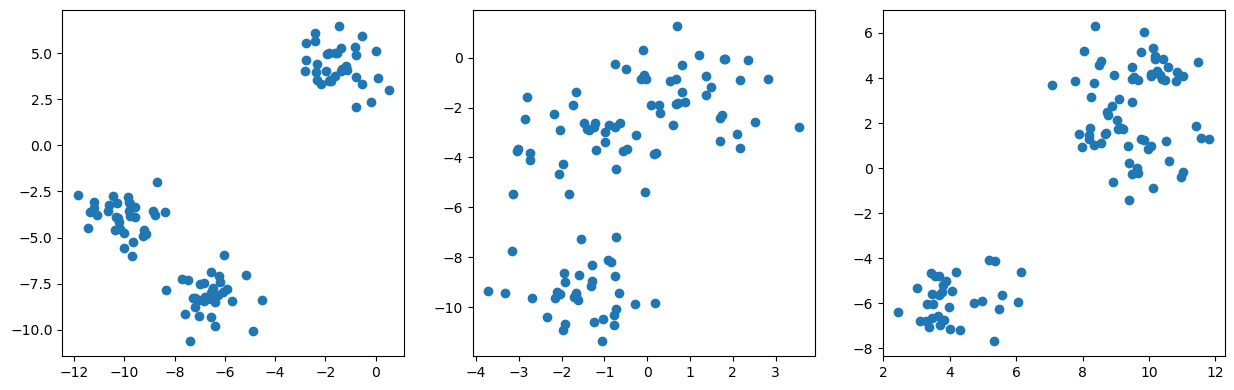

In [10]:
from sklearn.datasets import make_blobs
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from IPython import display
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter




fig, ax = plt.subplots(1, 3, figsize=(15,4.5))
#fig.figure(figsize=(30,5))
X1, y1 = make_blobs(n_samples=100, n_features=2, centers=3, random_state=1)
ax[0].scatter(X1[:,0], X1[:,1])
X2, y2 = make_blobs(n_samples=100, n_features=2, centers=3, random_state=2)
ax[1].scatter(X2[:,0], X2[:,1])
X3, y3 = make_blobs(n_samples=100, n_features=2, centers=3, random_state=4)
ax[2].scatter(X3[:,0], X3[:,1]);

Look at the above examples each containing a set of points. How many groups do you see in each case? As these examples illustrate, how many groups are there in a set of points is not always clear. Also note that our visual system is very powerful and can see instantly the groups in the given set of points. However, in a typical clustering problem there will be typically more than three features and it will not be possible to visualize the data points. To appriciate the difficuly of the problem, try to find the three groups above (on the left) when the dataset is given as a list of coordinates like below: 

In [11]:
print(X1)

[[-7.94152277e-01  2.10495117e+00]
 [-9.15155186e+00 -4.81286449e+00]
 [-1.14418263e+01 -4.45781441e+00]
 [-9.76761777e+00 -3.19133737e+00]
 [-4.53655648e+00 -8.40186288e+00]
 [-6.26302115e+00 -8.10666081e+00]
 [-6.38481234e+00 -8.47302970e+00]
 [-9.20490564e+00 -4.57687928e+00]
 [-2.76017908e+00  5.55121358e+00]
 [-1.17104176e+00  4.33091816e+00]
 [-1.00364080e+01 -5.56912090e+00]
 [-9.87589123e+00 -2.82386464e+00]
 [-7.17532921e+00 -8.77059017e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-4.87418245e+00 -1.00495890e+01]
 [-6.07854700e+00 -7.93969420e+00]
 [-6.83238762e+00 -7.47067670e+00]
 [-2.34673261e+00  3.56128423e+00]
 [-1.03415662e+01 -3.90975169e+00]
 [-1.10926243e+01 -3.78396611e+00]
 [-6.50212109e+00 -7.91249101e+00]
 [-1.02639310e+01 -3.92073400e+00]
 [-6.81608302e+00 -8.44986926e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.03729975e+01 -4.59207895e+00]
 [-7.37499896e+00 -1.05880659e+01]
 [-6.62351774e+00 -8.25338334e+00]
 [-1.35938959e+00  4.05424002e+00]
 [-1.97451969e-01  2

Moreover, there can be quite different notions of a group, as the following examples illustrate:

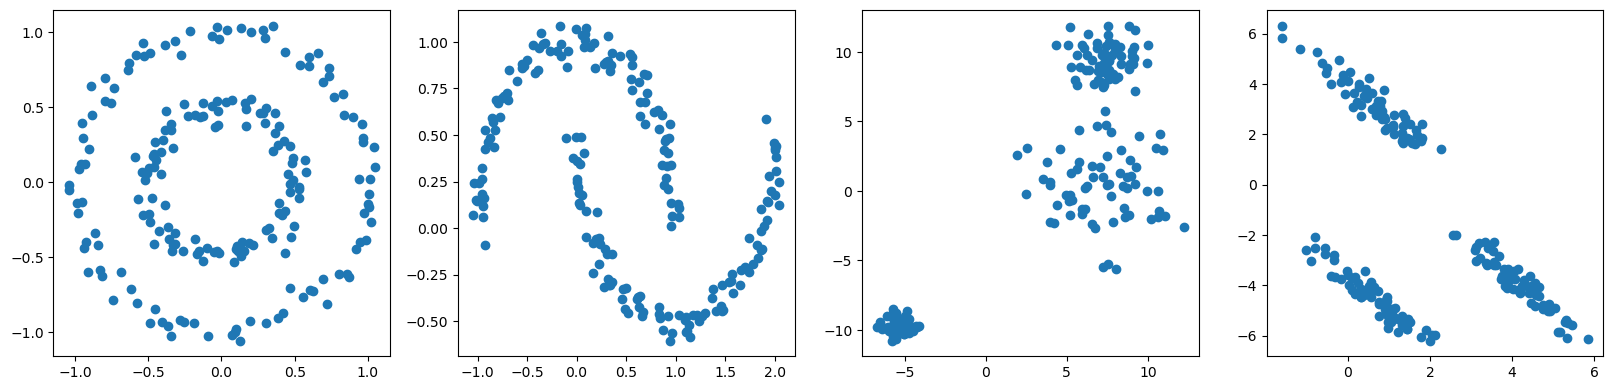

In [12]:
from sklearn.datasets import make_circles, make_moons
fig, ax = plt.subplots(1, 4, figsize=(20,4.5))
X,y = make_circles(n_samples=200, factor=.5, noise=.05)
ax[0].scatter(X[:,0], X[:,1])
X,y = make_moons(n_samples=200, noise=.05)
ax[1].scatter(X[:,0], X[:,1])
X,y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=8)
ax[2].scatter(X[:,0], X[:,1])
X, y = make_blobs(n_samples=200, random_state=8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
ax[3].scatter(X[:,0], X[:,1]);


### K-Means Clustering

#### Sum of Squared Error (SSE)

$$SSE=\sum_{i=1}^K\sum_{x \in C_i}||x-\mu_i||$$

where $x \in \mathbb{R}^n$ is a data point, $C_i$ is a cluster, $K$ is the total number of clusters, and $\mu_i$ is the mean of the points in $C_i$.


The objective of k-means clustering algorithm is to find $K$ clusters which minimizes the SSE. But it turns out that finding these clusters is an NP-hard problem. This means that nobody knows a fast (polynomial time) algorithm for this problem. Known algorithms have exponential running time which means that they are useless in practice. 

K-means is a heuristic algorithm which tries to minimize SSE. Since it is heuristic, it is not guaranteed to find an optimal solutions and it often terminates in a local optimum. Below is the k-means algorithm:

    Select K objects as initial cluster centers (centroids).
    Repeat
        Assignment step: assign each object to the nearest centroid.
        Update step: update the centroids of each cluster.
    until no change occurs.
    

### K-means running time

The running time of k-means algorithm is $O(K*d*I*n)$ where
- K is the number of clusters.
- d is the dimensionality of each object.
- I is the number of iterations of the repeat loop.
- n is the number of objects.

In practice, $K$, $d$, and $I$ are small numbers which makes this algorithm $O(n)$ in practice. This analysis shows that k-means is a fast algorithm which makes is suitable for clustering very large number of objects.

### Convergence of K-means

The proof of convergence of k-means is simple:
- Each step of k-means (assignment and update steps) decreases SSE.
- SSE is some positive number.
- So, in a finite number of steps the algoritm must stop.

### Examples

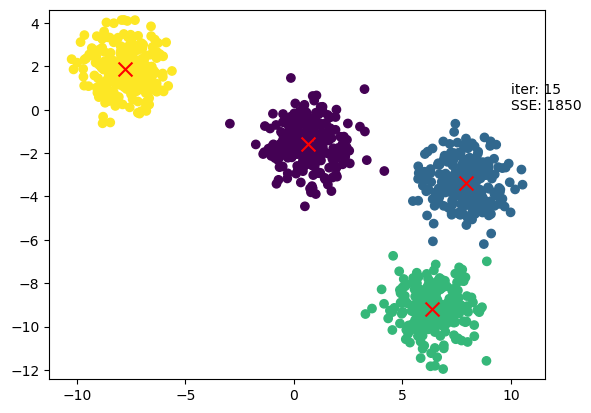

In [35]:
# Try also random_state 6
# Try setting n_clusters different from number of centers
X, y = make_blobs(n_samples=1000, random_state=6, centers=4)
converged = False
n_clusters = 4
random_state = 1
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=1, max_iter=1, init="random").fit(X)
prev_inertia = kmeans.inertia_
i = 2
while not converged:
    plt.clf()
    y_pred = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred);
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="r", s=100)
    plt.axis("equal")
    plt.text(10,0,"iter: {} \nSSE: {}".format(i-1, int(prev_inertia)))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(2)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=1, max_iter=i, init="random").fit(X)
    converged = prev_inertia == kmeans.inertia_ 
    prev_inertia = kmeans.inertia_
    i=i+1

In [32]:
X, y = make_blobs(n_samples=100, random_state=1)
km = KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)
print("Cluster Centers:")
print(km.cluster_centers_,"\n")
print("Cluster Labels of each sample:")
print(km.labels_,"\n");
print("Size of each cluster:")
print(Counter(km.labels_))

Cluster Centers:
[[-10.04935243  -3.85954095]
 [ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]] 

Cluster Labels of each sample:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1] 

Size of each cluster:
Counter({1: 34, 0: 33, 2: 33})


In [33]:
km.predict(X)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

### Elbow technique


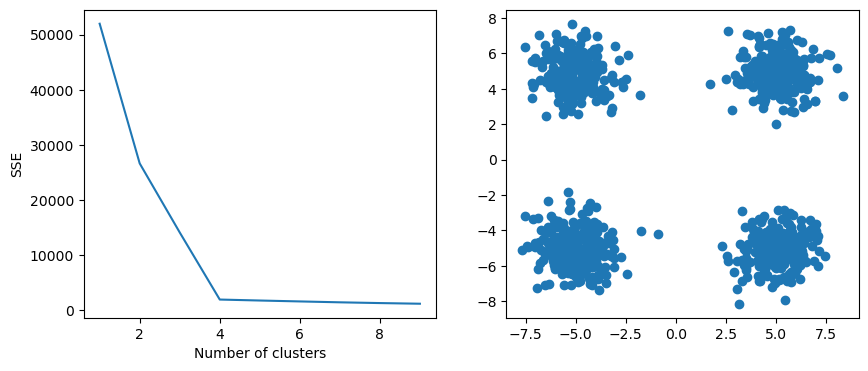

In [22]:
centers = [(-5, -5), (-5, 5), (5, 5), (5,-5)]
X, y = make_blobs(n_samples=1000, random_state=2, centers=centers)
# Increase the number of centers and see the result
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: This is SSE defined above
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1]);

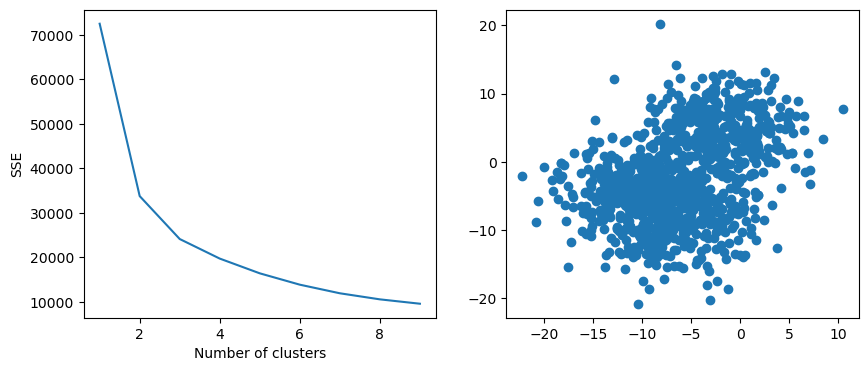

In [29]:
# The elbow technique will not work if clusters are not well seperated.
X, y = make_blobs(n_samples=1000, random_state=1, centers=3, cluster_std=4)
# Play with centers and see the result.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: This is SSE defined above
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1]);

### Sensitivity to initial clusters

Following is an example of a bad initialization. Note the init="random" parameter of kmeans, it forces the algorithm to choose initial centroids randomly. If you try other random_state values of kmeans you might find a good initialization.

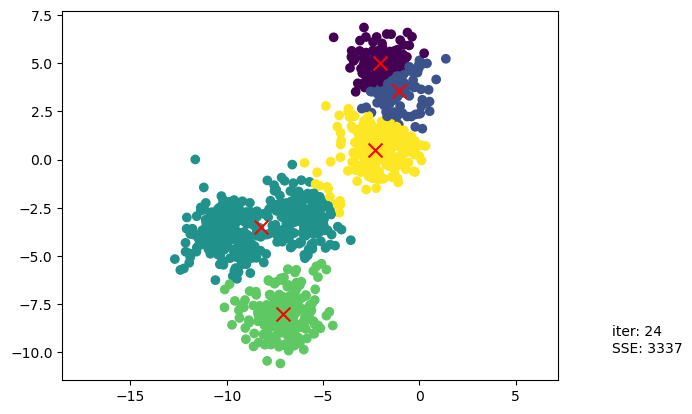

In [39]:
X, y = make_blobs(n_samples=1000, random_state=1, centers=5)
converged = False
kmeans = KMeans(n_clusters=5, random_state=2, n_init=1, max_iter=1, init="random").fit(X)
prev_inertia = kmeans.inertia_
i = 2
while not converged:
    plt.clf()
    y_pred = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred);
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="r", s=100)
    plt.axis("equal")
    plt.text(10,-10,"iter: {} \nSSE: {}".format(i-1, int(prev_inertia)))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)
    kmeans = KMeans(n_clusters=5, random_state=1, n_init=1, max_iter=i, init="random").fit(X)
    converged = prev_inertia == kmeans.inertia_ 
    prev_inertia = kmeans.inertia_
    i=i+1

### K-means++

K-means is a heuristic algorithm and is not guaranteed to find the optimal clustering with respect to SSE. It is also very sensitive to initial centroids. K-means++ is an efficient method to solve this problem.


K-means++ initialization
1. Choose the first centroid uniformly at random among the set of data points
2. For each data point $x$, compute $d(x)$, the distance of $x$ to each centroid.
3. Choose the next centroid from the data points where a point x is choosen with a probability
of $d(x)^2$
4. Repeat steps 2 and 3 until $K$ centroids are choosen.

Below example shows k-means++ in action. Note that the default initialization in sklearn's KMeans is kmeans++, so removing the init parameter is enough to choose it. Note that, for this example, even the initial centroids are choosen at just the right locations so there is little work remaining for kmeans.

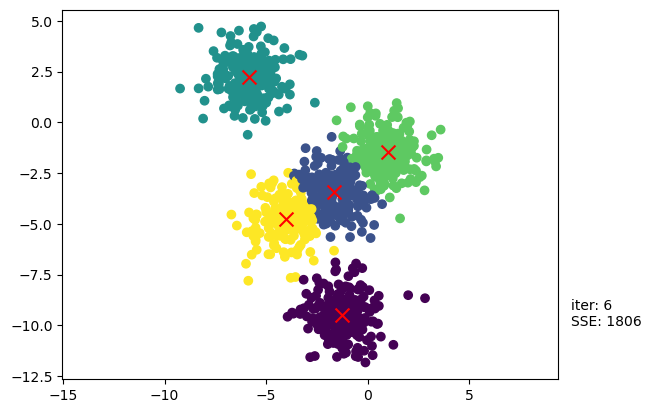

In [41]:
X, y = make_blobs(n_samples=1000, random_state=2, centers=5)
converged = False
random_state=3
kmeans = KMeans(n_clusters=5, random_state=random_state, n_init=1, max_iter=1).fit(X)
prev_inertia = kmeans.inertia_
i = 2
while not converged:
    plt.clf()
    y_pred = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred);
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="r", s=100)
    plt.axis("equal")
    plt.text(10,-10,"iter: {} \nSSE: {}".format(i-1, int(prev_inertia)))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(2.0)
    kmeans = KMeans(n_clusters=5, random_state=random_state, n_init=1, max_iter=i).fit(X)
    converged = prev_inertia == kmeans.inertia_ 
    prev_inertia = kmeans.inertia_
    i=i+1

### Disadvantages of k-means

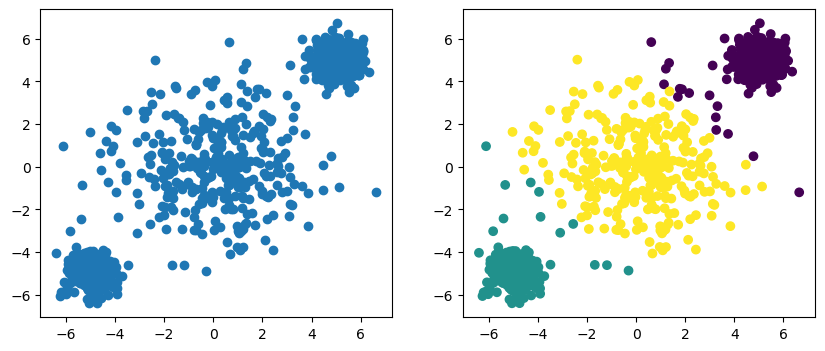

In [44]:
centers = [(-5, -5), (0,0), (5, 5)]

X, y = make_blobs(n_samples=1000,
                                cluster_std=[0.5, 2, 0.5],
                                random_state=1, centers=centers)
y_pred = KMeans(n_clusters=3,
                random_state=1, n_init=10).fit_predict(X)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

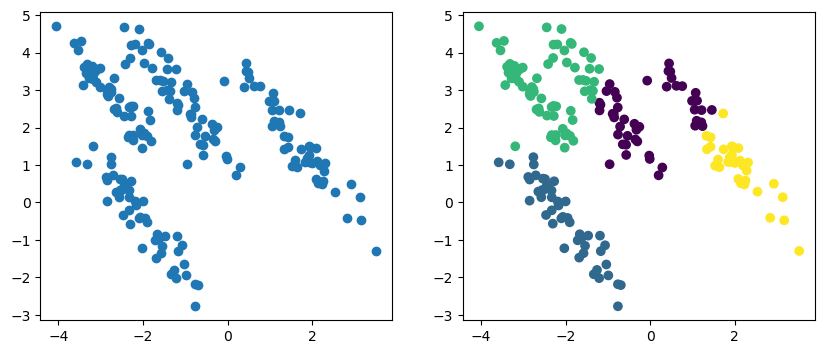

In [46]:
from sklearn.datasets import make_circles, make_moons

X, y = make_blobs(n_samples=200, centers=4, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=4,
                random_state=1, n_init="auto").fit_predict(X)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

### Hierarchical clustering using AgglomerativeClustering

In [47]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [48]:
iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [49]:
Counter(model.labels_)

Counter({1: 50, 2: 38, 3: 26, 0: 36})

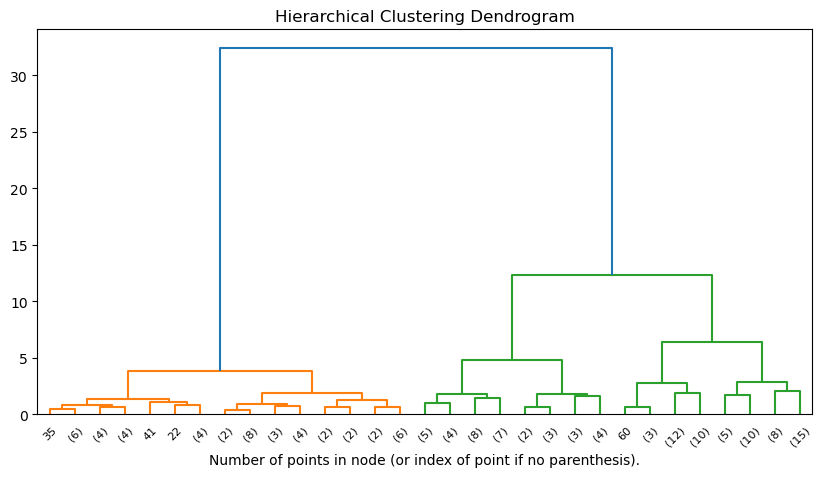

In [50]:
iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(compute_distances=True, n_clusters=3)
model = model.fit(X)
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### DBSCAN

The example below shows that dbscan finds better clusters than kmeans for this example.

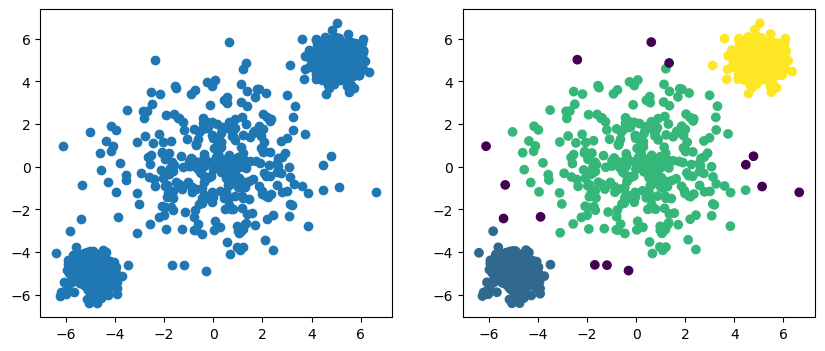

In [51]:
centers = [(-5, -5), (0,0), (5, 5)]

X, y = make_blobs(n_samples=1000,
                                cluster_std=[0.5, 2, 0.5],
                                random_state=1, centers=centers)
y_pred = DBSCAN(eps=1, min_samples=5).fit_predict(X)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

To find good values of the parameters $eps$ and $min\_samples$ the following method can be applied. The value where there is a sudden increase in the $n$th neighborgood distance can be choosen as the $eps$ and $n$ can be chosen as the $min\_samples$. Usually a small $n$ is chosen such as 3 or 4.

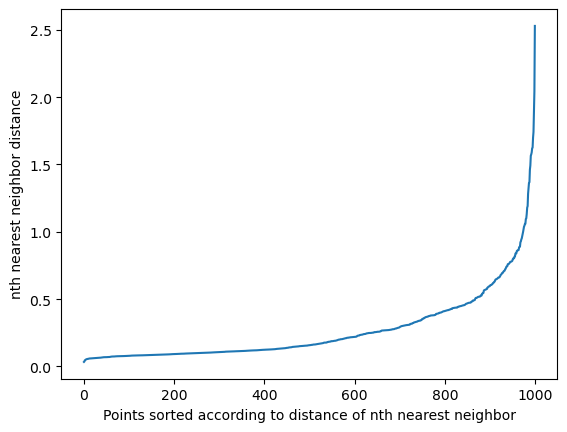

In [52]:
nn = NearestNeighbors(n_neighbors=5)
nbrs = nn.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)
plt.xlabel("Points sorted according to distance of nth nearest neighbor")
plt.ylabel("nth nearest neighbor distance");

A more difficult example

In [ ]:
X, y = make_blobs(n_samples=500, centers=4, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

y_pred = DBSCAN(eps=0.4, min_samples=5).fit_predict(X)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

In [ ]:
nn = NearestNeighbors(n_neighbors=5)
nbrs = nn.fit(X)
distances, indices = nbrs.kneighbors(X)
distances

In [ ]:
nn = NearestNeighbors(n_neighbors=5)
nbrs = nn.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)
plt.xlabel("Points sorted according to distance of nth nearest neighbor")
plt.ylabel("nth nearest neighbor distance");